In [2]:
import numpy as np
import pandas as pd

In [175]:
df = pd.read_csv(r"C:\Users\Jieyi\Downloads\increase.csv")

In [168]:
df_see = pd.read_csv(r"C:\Users\Jieyi\Downloads\increase.csv")

In [ ]:
df2 = pd.read_csv(r"C:\Users\Jieyi\Downloads\increase50.csv")

In [8]:
df[df["percentage_change"]>=10].shape

(35, 10)

In [16]:
df.loc[(df["percentage_change"] < 10).values & (df["percentage_change"] >= 5).values].shape

(45, 10)

In [22]:
df.loc[(df["percentage_change"] < 5).values & (df["percentage_change"] >= 2).values].shape

(158, 10)

In [ ]:
df.loc[(df["percentage_change"] < 5).values & (df["percentage_change"] >= 2.5).values].shape

In [176]:
category_ls = [["disease", "pandemic", "sick","epidemiologis","emerg"],
["employ", "work", "pay", "benefit", "insurance", "job", "debt", "labo", "wage"],
["med", "health", "hospitals", "sanitation", "nurse", "doctor","care"],
["econ", "debt", "finance", "bankruptcy", "liquidation", "revenue"]]

In [177]:
themes_1 = df["themes"][0:35].values
themes_2 = df["themes"][35:80].values
themes_3 = df["themes"][80:238].values
themes_4 = df["themes"][238:].values
themes_5 = df2["themes"][:450].values

In [178]:
def count_freq(x):
    ls = []
    for i in category_ls:
        num = 0
        for j in x:
            for k in i:
                if k in j:
                    num = num + 1
                    break
        ls.append(num)
    return ls

In [185]:
ls1 = np.add(count_freq(themes_1), count_freq(themes_2)).tolist()
ls2 = np.add(count_freq(themes_3), count_freq(themes_4)).tolist()
ls3 = count_freq(themes_5)

In [187]:
all_ls = [ls1, ls2, ls3]

In [188]:
bar1 = [i[0] for i in all_ls]
bar2 = [i[1] for i in all_ls]
bar3 = [i[2] for i in all_ls]
bar4 = [i[3] for i in all_ls]

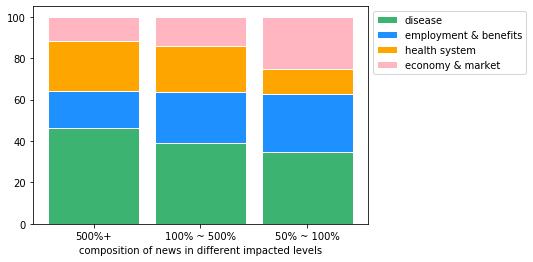

<Figure size 864x288 with 0 Axes>

In [197]:
import matplotlib.pyplot as plt
from matplotlib import rc
import pandas as pd
from matplotlib.pyplot import figure
 
# Data
r = [0,1,2]
raw_data = {'bar1': bar1, 'bar2': bar2,'bar3': bar3,
           'bar4': bar4}
df = pd.DataFrame(raw_data)
 
# From raw value to percentage
totals = [i+j+k+l for i,j,k,l in zip(df['bar1'], df['bar2'], df['bar3'], df['bar4'])]
Bars1 = [i / j * 100 for i,j in zip(df['bar1'], totals)]
Bars2 = [i / j * 100 for i,j in zip(df['bar2'], totals)]
Bars3 = [i / j * 100 for i,j in zip(df['bar3'], totals)]
Bars4 = [i / j * 100 for i,j in zip(df['bar4'], totals)]

 
# plot
barWidth = 0.85
names = ('500%+','100% ~ 500%','50% ~ 100%')
# Create green Bars
plt.bar(r, Bars1, color='mediumseagreen', edgecolor='white', width=barWidth, label = "disease")
# Create orange Bars
plt.bar(r, Bars2, bottom=Bars1, color='dodgerblue', edgecolor='white', width=barWidth, label = "employment & benefits")
# Create blue Bars
plt.bar(r, Bars3, bottom=[i+j for i,j in zip(Bars1, Bars2)], color='orange', edgecolor='white', width=barWidth,
       label = "health system")
plt.bar(r, Bars4, bottom=[i+j+k for i,j,k in zip(Bars1, Bars2, Bars3)], color='lightpink', 
        edgecolor='white', width=barWidth, label = "economy & market")

# Add a legend
plt.legend(loc='upper left', bbox_to_anchor=(1,1), ncol=1)

# Custom x axis
plt.xticks(r, names)
plt.xlabel("composition of news in different impacted levels")
figure(figsize = (12,4))
 
# Show graphic
plt.show()
 

## reference: 
https://python-graph-gallery.com/13-percent-stacked-barplot/